In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests

In [11]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.strip().replace(".","-")
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

In [12]:
save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP

In [ ]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'morningstar', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


In [14]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

In [15]:
compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  MMM       ABT  ABBV      ABMD  ...       ZBRA  ZBH       ZION  ZTS
Date                                             ...                                
2000-01-03  27.588531  8.834740   NaN  18.25000  ...  25.027779  NaN  39.731110  NaN
2000-01-04  26.492285  8.582321   NaN  17.81250  ...  24.666666  NaN  37.807178  NaN
2000-01-05  27.259663  8.566545   NaN  18.00000  ...  25.138889  NaN  37.762455  NaN
2000-01-06  29.452133  8.866295   NaN  18.03125  ...  23.777779  NaN  38.299366  NaN
2000-01-07  30.036783  8.960954   NaN  17.93750  ...  23.513889  NaN  38.388844  NaN

[5 rows x 505 columns]


In [19]:
def visualize_data():
    df = pd.read_csv('/content/sp500_joined_closes.csv')
    df_corr = df.corr()
    print(df_corr)

    data = df_corr.values

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)

    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)

    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()

           MMM       ABT      ABBV  ...       ZBH      ZION       ZTS
MMM   1.000000  0.850444  0.808792  ...  0.901019 -0.003012  0.521047
ABT   0.850444  1.000000  0.839826  ...  0.854395 -0.009612  0.986738
ABBV  0.808792  0.839826  1.000000  ...  0.776264  0.773446  0.848217
ABMD  0.838426  0.857655  0.860419  ...  0.756025  0.156178  0.726236
ACN   0.901296  0.982423  0.895501  ...  0.883543 -0.013106  0.979350
...        ...       ...       ...  ...       ...       ...       ...
YUM   0.927831  0.950044  0.834729  ...  0.875849 -0.086102  0.912968
ZBRA  0.768422  0.962356  0.831984  ...  0.820942  0.130200  0.966141
ZBH   0.901019  0.854395  0.776264  ...  1.000000  0.173415  0.796806
ZION -0.003012 -0.009612  0.773446  ...  0.173415  1.000000  0.567538
ZTS   0.521047  0.986738  0.848217  ...  0.796806  0.567538  1.000000

[505 rows x 505 columns]


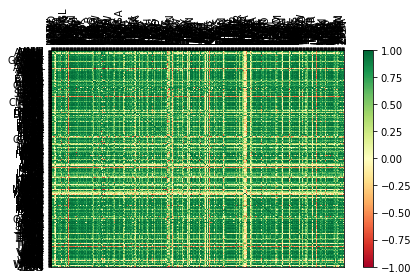

In [20]:
visualize_data()